In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_daily', 'uber_hourly']


In [4]:
dataset = get_dataset("uber_daily", regenerate=True)

In [5]:
train_data = list(dataset.train)
test_data = list(dataset.test)

/home/zyy1999/gluon-ts/src/gluonts/dataset/common.py:326: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/zyy1999/gluon-ts/src/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/home/zyy1999/gluon-ts/src/gluonts/dataset/common.py:331: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/home/zyy1999/gluon-ts/src/gluonts/dataset/common.py:331: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/home/zyy1999/gluon-ts/src/gluonts/dataset/util.py:138: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqst

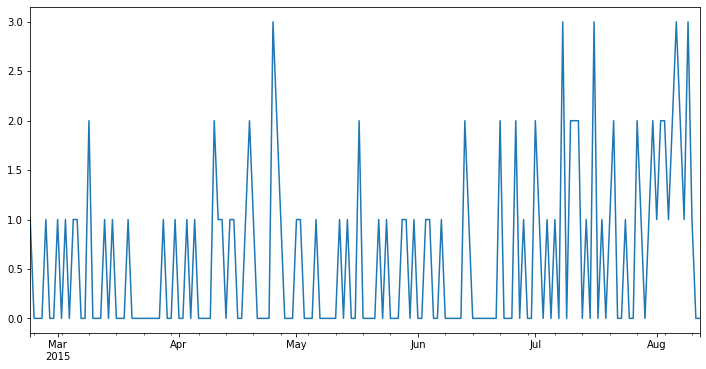

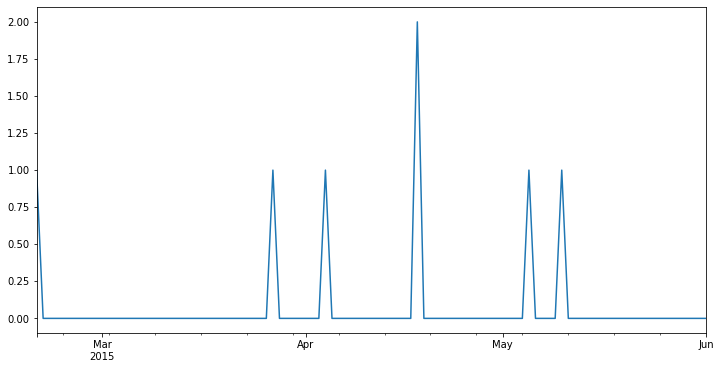

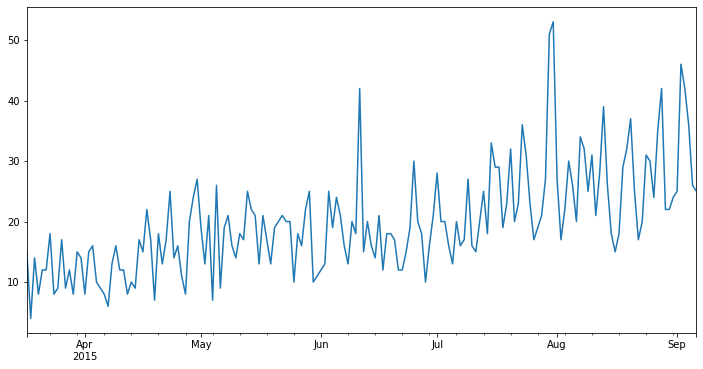

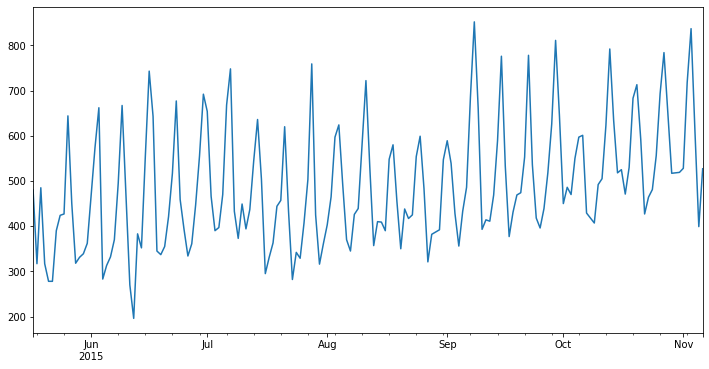

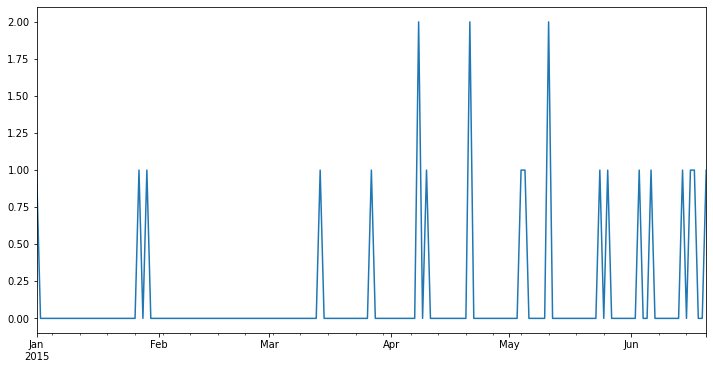

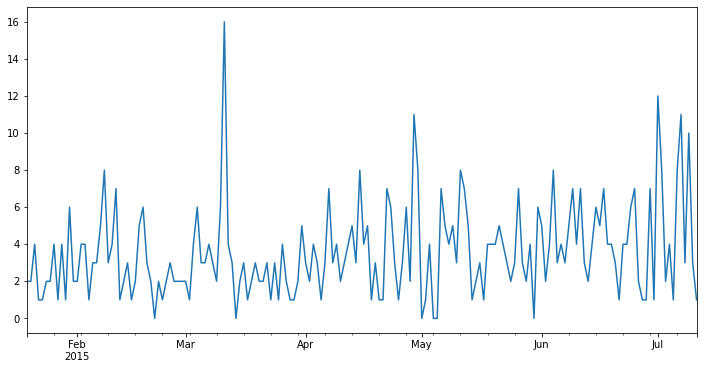

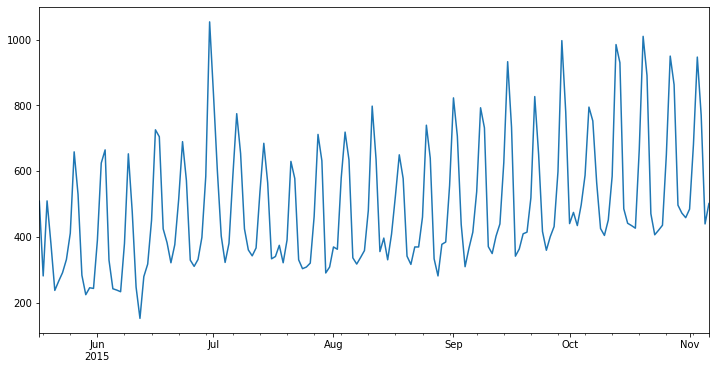

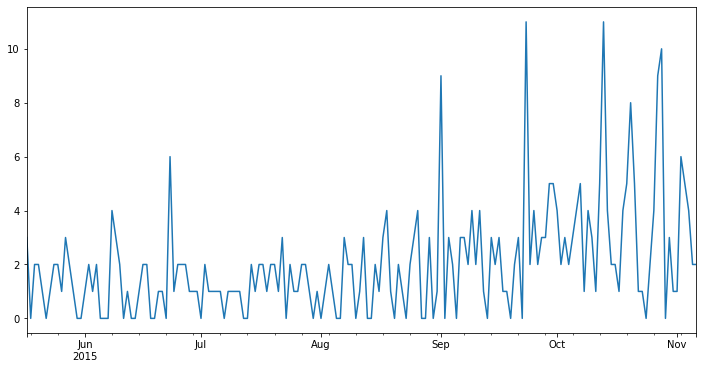

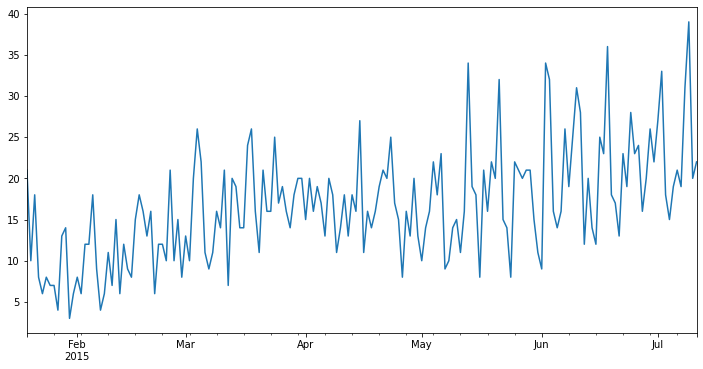

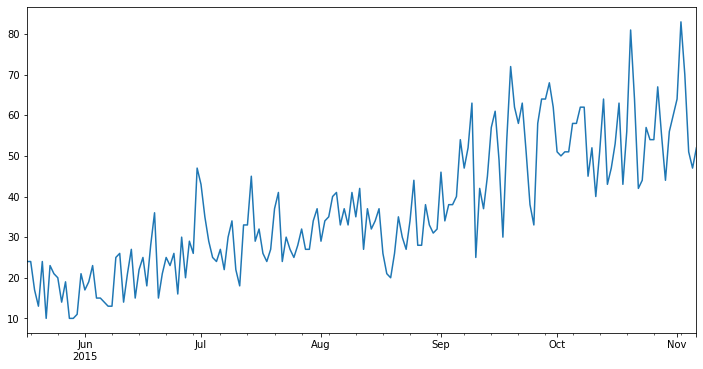

In [6]:
from itertools import islice

for ts in islice(train_data, 10):
    fig, ax = plt.subplots(figsize=(12, 6))

    ts = to_pandas(ts)
    ts.plot()

In [7]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer

In [8]:
deepar = DeepAREstimator(freq="D", prediction_length=10, trainer=Trainer(epochs=30))

In [9]:
model = deepar.train(train_data)

/home/zyy1999/gluon-ts/src/gluonts/transform/feature.py:365: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base = start.freq.base
/home/zyy1999/gluon-ts/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/zyy1999/gluon-ts/src/gluonts/transform/feature.py:408: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None
/home/zyy1999/gluon-ts/src/gluonts/transform/feature.py:360: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  assert self._freq_base is None or self._freq_base == start.freq.base, (
  0%|                                                                          | 0/50 [00:00<?, ?it/s]/home/zyy1999/gluon-ts/src/gluonts/transform/feature.py:360: FutureWarning: Timestamp.freq is deprecated and 

In [10]:
from gluonts.evaluation import make_evaluation_predictions

In [11]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=model,  # predictor
    num_samples=250,  # number of sample paths we want for evaluation
)

In [12]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [13]:
ts_entry = tss[8]
forecast_entry = forecasts[8]

In [14]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

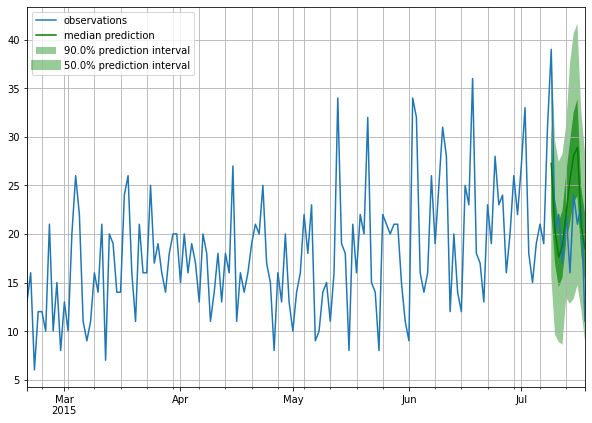

In [15]:
plot_prob_forecasts(ts_entry, forecast_entry)